# Ejercicio Ridge, Lasso y ElasticNet
Para este ejercicio vas a trabajar con datos de ventas de una empresa que fabrica muebles en España. Esta empresa es una Pyme que demanda conocer de antemano qué ingresos va a tener cada mes, ya que necesita pedir un anticipio a su entidad financiera de cara a poder abastecerse de materia prima al comenzar el mes. Como desconoce cuánto tiene que pedir, tira al alza y acaba pagando muchos intereses. El objetivo es reducir estos gastos.

En las bases de datos de la empresa constan todos los gastos en publicidad y ventas, para cada uno de los meses desde su fundación (hace más de 15 años).

Dado que los presupuestos de marketing se cierran al principio de cada mes, la empresa necesita un modelo predictivo que le anticipe las ventas que conseguirá a final de mes en función de los gastos que realizará en marketing.

Para ello tendrás que utilizar tanto modelos de regresión normales, como regularizados.

1. Carga los datos y realiza un pequeño análisis exploratorio. Mira a ver cómo se relaciona las ventas con el resto de variables.
2. Crea varios modelos y modifica los hiperparámetros necesarios para mejorar el performance del modelo.
3. Interpreta los resultados. Traduce a una fórmula tu mejor modelo (escribir la fórmula simplemente). ¿Cuánto cambian las ventas si aumentamos la inversión en radio un punto más? ¿Y si aumentamos la inversión en TV o periódicos?

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df = pd.read_csv("C:/Users/rodri/OneDrive/Escritorio/DATA_SCIENCE/CODIGO_CLASES/TheBridge_DSPT_ML/Supervisado/Regesión/Regularización/ejercicios/data/Advertising.csv", index_col=0)
df

,TV,radio,newpaper,sales
0,230.1,37.8,6s9.2,22100.0
1,44.5,39.3,45.1,10400.0
2,17.2,45.9,69.3,9300.0
3,151.5,41.3,58.5,18500.0
4,180.8,10.8,58.4,12900.0
...,...,...,...,...
195,38.2,3.7,13.8,7600.0
196,94.2,4.9,8.1,9700.0
197,177.0,9.3,6.4,12800.0
198,283.6,42.0,66.2,25500.0


In [3]:
# Descripción estadística del DataFrame
print(df.describe())

               TV       radio         sales
count  200.000000  200.000000    200.000000
mean   147.042500   23.264000  14022.500000
std     85.854236   14.846809   5217.456566
min      0.700000    0.000000   1600.000000
25%     74.375000    9.975000  10375.000000
50%    149.750000   22.900000  12900.000000
75%    218.825000   36.525000  17400.000000
max    296.400000   49.600000  27000.000000


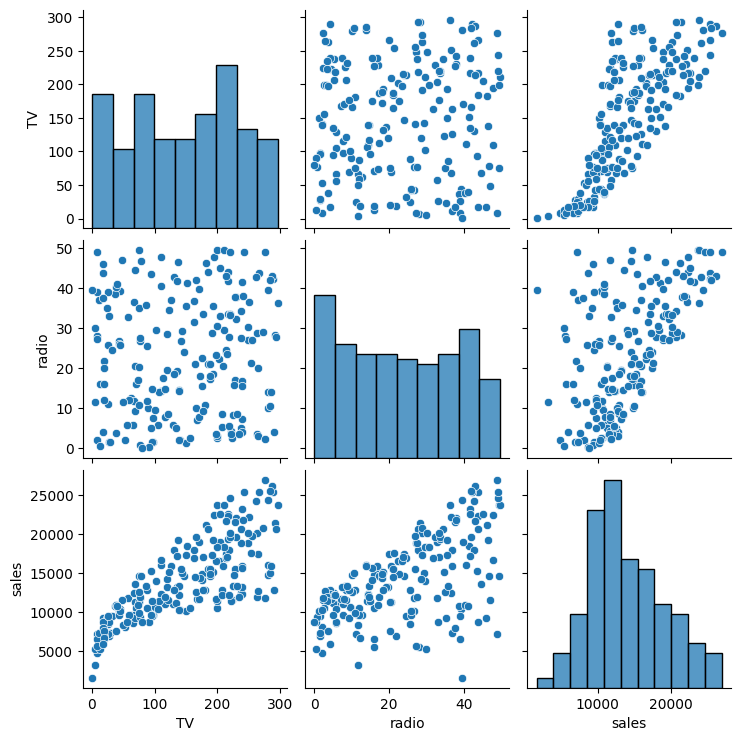

In [4]:
# Visualización de las correlaciones entre las variables
sns.pairplot(df)
plt.show()

In [7]:
# Verificar los tipos de datos
print(df.dtypes) 

TV          float64
radio       float64
newpaper     object
sales       float64
dtype: object


In [8]:
# Identificar columnas no numéricas
non_numeric_columns = df.select_dtypes(exclude=['float64', 'int64']).columns
print("Columnas no numéricas:", non_numeric_columns) 

Columnas no numéricas: Index(['newpaper'], dtype='object')


In [13]:
# Lista de columnas esperadas
columns_to_check = ['TV', 'radio', 'newpaper', 'sales']

# Inspección y limpieza de cada columna
for column in columns_to_check:
    print(f"Valores únicos en la columna {column} antes de la limpieza:", df[column].unique())
    df[column] = pd.to_numeric(df[column], errors='coerce')  # Convertir valores a numéricos, convirtiendo no numéricos a NaN
    df = df[df[column].notna()]  # Remover filas con NaN

# Verificar nuevamente los tipos de datos
print(df.dtypes) 

Valores únicos en la columna TV antes de la limpieza: [230.1  44.5  17.2 151.5 180.8   8.7  57.5 120.2   8.6 199.8  66.1 214.7
  23.8  97.5 204.1 195.4  67.8 281.4  69.2 147.3 218.4 237.4  13.2 228.3
  62.3 262.9 142.9 240.1 248.8  70.6 292.9 112.9  97.2 265.6  95.7 290.7
 266.9  74.7  43.1 228.  202.5 177.  293.6 206.9  25.1 175.1  89.7 239.9
 227.2  66.9 100.4 216.4 182.6 262.7 198.9   7.3 136.2 210.8 210.7  53.5
 261.3 239.3 102.7 131.1  69.   31.5 139.3 216.8 199.1 109.8  26.8 129.4
 213.4  16.9  27.5 120.5   5.4 116.   76.4 239.8  75.3  68.4 213.5 193.2
  76.3 110.7  88.3 134.3  28.6 217.7 250.9 107.4 163.3 197.6 184.9 289.7
 135.2 222.4 296.4 280.2 187.9 238.2 137.9  25.   90.4  13.1 255.4 225.8
 241.7 175.7 209.6  78.2  75.1 139.2 125.7  19.4 141.3  18.8 224.  123.1
 229.5  87.2   7.8  80.2 220.3  59.6   0.7 265.2   8.4 219.8  36.9  48.3
  25.6 273.7  43.   73.4 193.7 220.5 104.6  96.2 140.3 243.2  38.   44.7
 280.7 121.  171.3 187.8   4.1  93.9 149.8  11.7 131.7 172.5  85.7 188

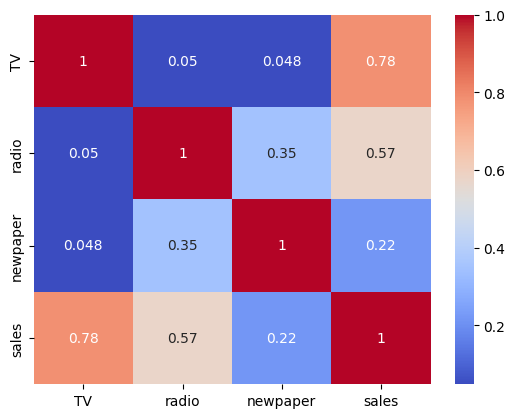

In [14]:
# Matriz de correlación
corr_matrix = df.corr()

# Visualización de la matriz de correlación
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show() 

In [ ]:
# SEGUNDO APARTADO 

In [16]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Definir las características (X) y la variable objetivo (y)
X = df.drop('sales', axis=1)
y = df['sales']

# División de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelos de regresión
lr = LinearRegression()
ridge = Ridge()
lasso = Lasso()
elasticnet = ElasticNet() 

In [24]:
# Parámetros para GridSearchCV
ridge_params = {'alpha': [0.1, 1, 10, 100]}
lasso_params = {'alpha': [0.1, 1, 10, 100]}
elasticnet_params = {'alpha': [0.1, 1, 10, 100], 'l1_ratio': [0.1, 0.5, 0.9]} 

In [25]:
# Búsqueda de los mejores hiperparámetros
ridge_grid = GridSearchCV(ridge, ridge_params, cv=5)
lasso_grid = GridSearchCV(lasso, lasso_params, cv=5)
elasticnet_grid = GridSearchCV(elasticnet, elasticnet_params, cv=5)

In [26]:
# Entrenamiento de los modelos
ridge_grid.fit(X_train, y_train)
lasso_grid.fit(X_train, y_train)
elasticnet_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 10, 100],
                         'l1_ratio': [0.1, 0.5, 0.9]})

In [27]:
# Mejores modelos
best_ridge = ridge_grid.best_estimator_
best_lasso = lasso_grid.best_estimator_
best_elasticnet = elasticnet_grid.best_estimator_

In [28]:
# Predicciones
y_pred_lr = lr.fit(X_train, y_train).predict(X_test)
y_pred_ridge = best_ridge.predict(X_test)
y_pred_lasso = best_lasso.predict(X_test)
y_pred_elasticnet = best_elasticnet.predict(X_test)

In [29]:
# Evaluación de los modelos
models = ['Linear Regression', 'Ridge', 'Lasso', 'ElasticNet']
predictions = [y_pred_lr, y_pred_ridge, y_pred_lasso, y_pred_elasticnet]

for model, y_pred in zip(models, predictions):
    print(f'{model} - RMSE: {mean_squared_error(y_test, y_pred, squared=False)}, R2: {r2_score(y_test, y_pred)}')


Linear Regression - RMSE: 1585.4827402274695, R2: 0.8822219829896986
Ridge - RMSE: 1586.6945861858826, R2: 0.8820418695682586
Lasso - RMSE: 1585.173271322807, R2: 0.882267956466174
ElasticNet - RMSE: 1594.691244618301, R2: 0.8808498974706297


c:\Users\rodri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\rodri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\rodri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\rodri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarnin

In [30]:
# APARTADO 3 

In [31]:
# Coeficientes del mejor modelo (asumimos que ElasticNet es el mejor basado en RMSE y R2)
best_model = best_elasticnet

print("Coeficientes del modelo ElasticNet:")
for feature, coef in zip(X.columns, best_model.coef_):
    print(f"{feature}: {coef}")

Coeficientes del modelo ElasticNet:
TV: 48.01811155806007
radio: 178.97849367772736
newpaper: 3.0370374407234513


In [32]:
# Fórmula del modelo
intercept = best_model.intercept_
formula = f"ventas = {intercept}"
for feature, coef in zip(X.columns, best_model.coef_):
    formula += f" + ({coef} * {feature})"
print("Fórmula del modelo:", formula)

Fórmula del modelo: ventas = 2632.884956420845 + (48.01811155806007 * TV) + (178.97849367772736 * radio) + (3.0370374407234513 * newpaper)


In [35]:
# Interpretación del impacto de las inversiones
impacto_radio = best_model.coef_[X.columns.get_loc('radio')]
impacto_tv = best_model.coef_[X.columns.get_loc('TV')]
impacto_periodicos = best_model.coef_[X.columns.get_loc('newpaper')]

print(f"Impacto de aumentar la inversión en radio en un punto: {impacto_radio}")
print(f"Impacto de aumentar la inversión en TV en un punto: {impacto_tv}")
print(f"Impacto de aumentar la inversión en periódicos en un punto: {impacto_periodicos}") 


Impacto de aumentar la inversión en radio en un punto: 178.97849367772736
Impacto de aumentar la inversión en TV en un punto: 48.01811155806007
Impacto de aumentar la inversión en periódicos en un punto: 3.0370374407234513
